In [239]:
import pandas as pd
import matplotlib.pyplot as plt

In [240]:
import scipy.stats as sta
import statistics as sts
import scipy.ndimage as ndim
import numpy as np

In [241]:
filename = '/home/brendaalencar/facul/bm/bir-black-mouth-docs/data/Tests/vel_stab_plane_IMU/stability_velocity_plane_imu.csv'  
df = pd.read_csv(filename)
tempo= df.iloc[:,1]
velocidade_media = 1.5/tempo

In [242]:
velocidade_media

0     0.033434
1     0.034300
2     0.034231
3     0.034602
4     0.032753
5     0.032808
6     0.032366
7     0.033223
8     0.033632
9     0.032269
10    0.033529
11    0.032475
Name: tempo, dtype: float64

In [243]:
df.insert(2,'velocidade',velocidade_media, True)

In [244]:
print(df.columns.tolist())                                         

['estabilidade', 'tempo', 'velocidade', 'roll_max', 'roll_min', 'roll_oscilation', 'pitch_max', 'pitch_min', 'pitch_oscilation']


In [245]:
df.head()

,estabilidade,tempo,velocidade,roll_max,roll_min,roll_oscilation,pitch_max,pitch_min,pitch_oscilation
0,False,44.865163,0.033434,3.626074,-2.627311,6.253385,2.850613,-2.784902,5.635514
1,False,43.731822,0.034300,3.477813,-4.443612,7.921425,2.428159,-4.029955,6.458114
2,False,43.819761,0.034231,6.174569,-4.880062,11.054630,5.469006,-4.359051,9.828057
3,False,43.350480,0.034602,4.657300,-4.163298,8.820598,4.489015,-3.484709,7.973724
4,False,45.796669,0.032753,3.225036,-3.616543,6.841579,3.301129,-2.618959,5.920088


In [246]:
df.mean()

estabilidade         0.000000
tempo               45.065695
velocidade           0.033302
roll_max             4.215806
roll_min            -4.527013
roll_oscilation      8.742818
pitch_max            4.256276
pitch_min           -4.039287
pitch_oscilation     8.295563
dtype: float64

## Distribuição normal
### Observações
- Distribuição normal é uma função de probabilidade usada em estatísticas que informa sobre como os valores dos dados são distribuídos. 

- Quanto maior a variancia,  mais baixo o topo da distribuição fica

- É necessário um grande número de testes




In [247]:
# Variancia 
sts.variance(tempo)

1.138108734755293

In [248]:
sts.variance(velocidade_media)

6.276564928326062e-07

In [249]:
# standart deviation (grau de dispersão de um conjunto de dados)
# O desvio padrão é uma medida que expressa o grau de dispersão de um conjunto de dados. Ou seja, o desvio padrão indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados.
sta.tstd(df)


array([0.00000000e+00, 1.06682179e+00, 7.92247747e-04, 8.79658889e-01,
       1.47839707e+00, 2.14591763e+00, 1.20382133e+00, 1.32182234e+00,
       2.38651055e+00])

In [250]:
sta.tstd()


TypeError: tstd() missing 1 required positional argument: 'a'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3506f31340>]],
      dtype=object)

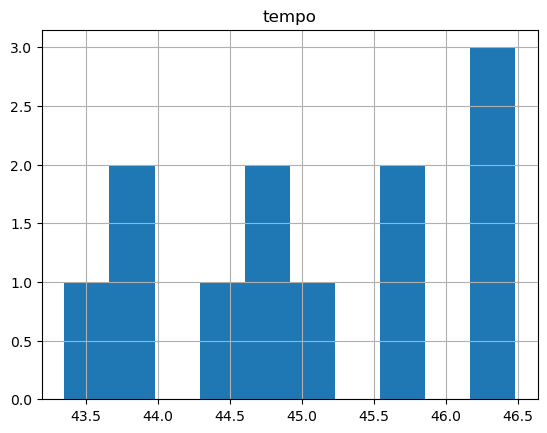

In [ ]:
df.hist(column='tempo')
# plt.xlim((0.45, 0.6)2

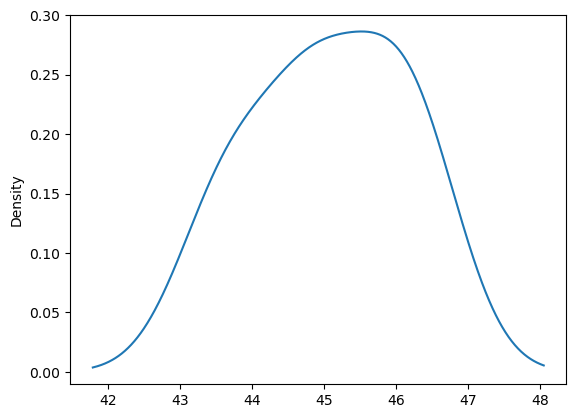

In [ ]:
ax = tempo.plot.kde()

In [ ]:
density = sta.gaussian_kde(tempo)
## probabilidade de estar na média
density(df.iloc[:,1].mean())

array([0.28160316])


A fim de avaliar se o controle de estabilidade aqui proposto contribuiu de fato na estabilidade da caminhada, utilizaremos o teste T-Student de uma amostra. Então, foi proposto que a hipotése nula é que a oscilação de rotação do corpo não foi melhorada com o uso do controle de estabilidade, considerando testes entre os mesmos terrenos.

In [254]:
results, pvalue = sta.ttest_1samp(df['velocidade'], 0.05, alternative='two-sided')
print(results)
print(pvalue)

-73.01227722483497
3.955001882078621e-16


In [255]:
results, pvalue = sta.ttest_1samp(df['tempo'],30.0, alternative='two-sided')
print(results)
print(pvalue)

48.92016525872323
3.195715045300835e-14


In [252]:
results, pvalue = sta.ttest_1samp(df['roll_oscilation'], 12.541305, alternative='two-sided')
print(results)
print(pvalue)

-6.131802624872009
7.395635803322588e-05


In [226]:
results, pvalue = sta.ttest_1samp(df['pitch_oscilation'], 15.189755, alternative='two-sided')
print(results)
print(pvalue)

-10.007155690707888
7.340333603110941e-07
